In [1]:
import numpy as np
import os
from scipy import misc
import matplotlib.pyplot as plt
from functools import reduce
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split

%matplotlib notebook

In [33]:
input_image = tf.placeholder(tf.float32, shape=[1, None, None, 1])
input_image

<tf.Tensor 'Placeholder_3:0' shape=(1, ?, ?, 1) dtype=float32>

In [34]:
avg_size = (30, 60)
resized_image = tf.image.resize_images(input_image, size = avg_size)
resized_image

<tf.Tensor 'ResizeBilinear_3:0' shape=(1, 30, 60, 1) dtype=float32>

In [35]:
rootdir = 'class_data'
resizeddir = 'resized_data'

In [36]:
sess = tf.Session()

In [41]:
for filename in os.listdir(rootdir + '/HW/'):
    img = misc.imread(rootdir + '/HW/' + filename).astype(np.float)
    img = to_grayscale(img)
    width = img.shape[0]
    height = img.shape[1]
    img = np.reshape(img, (1, width, height, 1))
    new_img = resized_image.eval(session = sess, feed_dict = {input_image:img})
    new_img = np.reshape(new_img, (avg_size))
    new_img = Image.fromarray(new_img)
    new_img = new_img.convert('RGB')
    new_img.save(resizeddir + '/HW/' + filename)

In [42]:
for filename in os.listdir(rootdir + '/MP/'):
    img = misc.imread(rootdir + '/MP/' + filename).astype(np.float)
    img = to_grayscale(img)
    width = img.shape[0]
    height = img.shape[1]
    img = np.reshape(img, (1, width, height, 1))
    new_img = resized_image.eval(session = sess, feed_dict = {input_image:img})
    new_img = np.reshape(new_img, (avg_size))
    new_img = Image.fromarray(new_img)
    new_img = new_img.convert('RGB')
    new_img.save(resizeddir + '/MP/' + filename)

(30, 60)


<IPython.core.display.Javascript object>


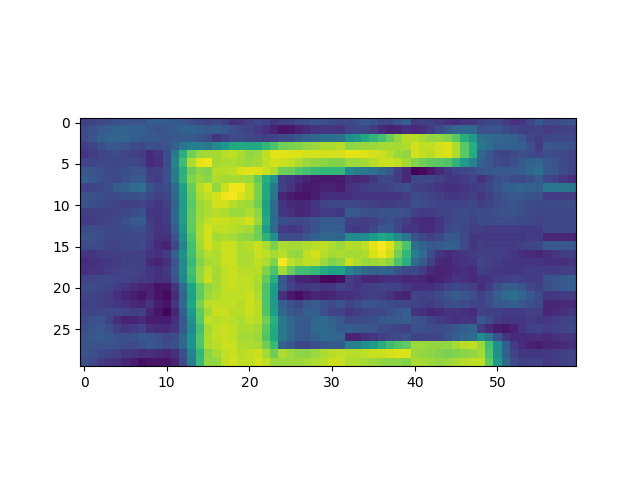

In [49]:
for filename in os.listdir(resizeddir + '/MP/')[:1]:
    img = misc.imread(resizeddir + '/MP/' + filename, mode = 'F').astype(np.float)
    print(img.shape)
    plt.imshow(img)